## Data Generator

Projeto do curso de DS da Awari - Exercício em aula

In [4]:
%matplotlib inline
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [5]:
image = io.imread('beatles.jpg')

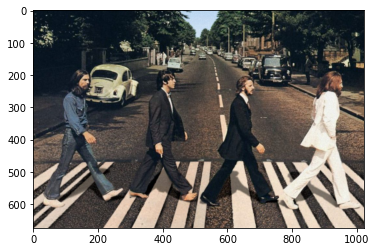

In [6]:
plt.imshow(image)

In [7]:
np.shape(image)

(673, 1024, 3)

### Mostrar os canais

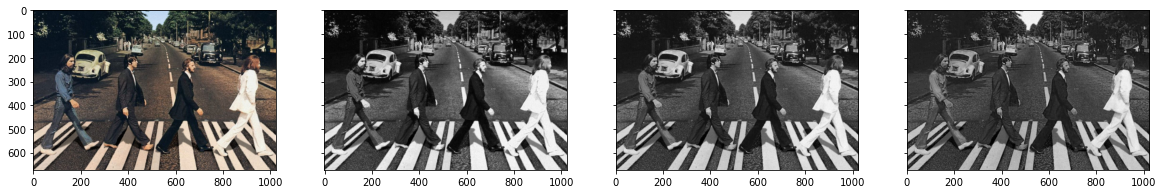

In [8]:
fig, ax = plt.subplots(1,4,sharey=True)
fig.set_figwidth(20)

ax[0].imshow(image)
ax[1].imshow(image[:,:,0],cmap='gray')#Vermelho
ax[2].imshow(image[:,:,1],cmap='gray')#Azul
ax[3].imshow(image[:,:,2],cmap='gray')#Verde

plt.show()

# Transformação de cor

In [9]:
from skimage.color import rgb2hsv, rgb2gray

In [10]:
imagem_cinza = rgb2gray(image)

In [11]:
np.shape(imagem_cinza)

(673, 1024)

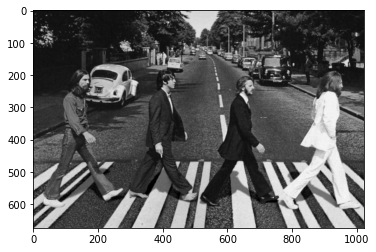

In [12]:
plt.imshow(imagem_cinza,cmap='gray')

In [13]:
imagem_hsv = rgb2hsv(image)

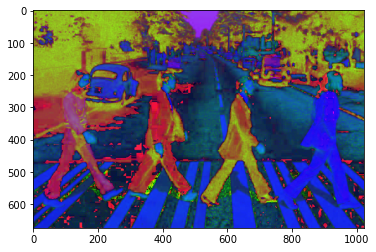

In [14]:
plt.imshow(imagem_hsv)

# ImageDataGenerator

In [15]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array

In [16]:
image_array = img_to_array(image)

In [17]:
np.shape(image_array)

(673, 1024, 3)

## Função Auxiliar

In [24]:
def show_datagen(datagen, image):
    
    it = datagen.flow(image.reshape(1, 673, 1024, 3),batch_size=1)
    
    fig, im = plt.subplots(1,3, figsize=(15,15))
    
    for i in range(3):
        
        imagem_gerada = next(it)[0].astype('uint8')
        
        im[i].imshow(imagem_gerada)
        
    plt.show()

## Shift horizontal, vertical 

In [25]:
datagen_shift = ImageDataGenerator(width_shift_range=0.2, height_shift_range= 0.2)

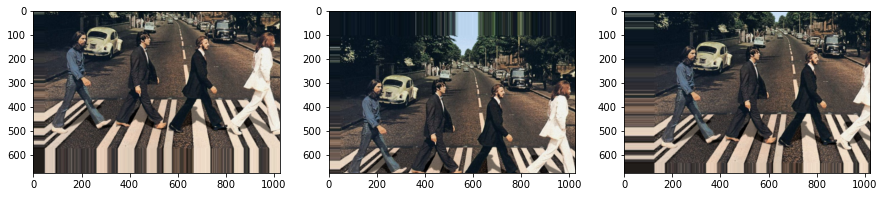

In [26]:
show_datagen(datagen_shift,image)

## Flip Horizontal/Vertical

In [27]:
datagen_flip = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

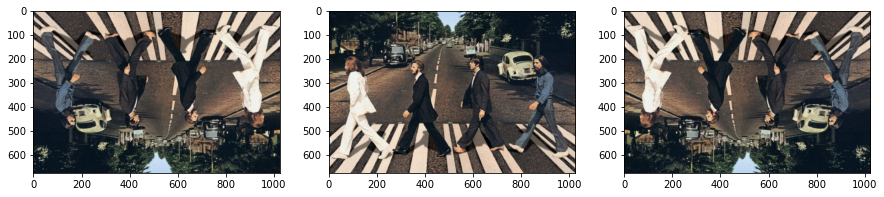

In [28]:
show_datagen(datagen_flip,image)

## Rotação

In [29]:
datagen_rot = ImageDataGenerator(rotation_range=90)

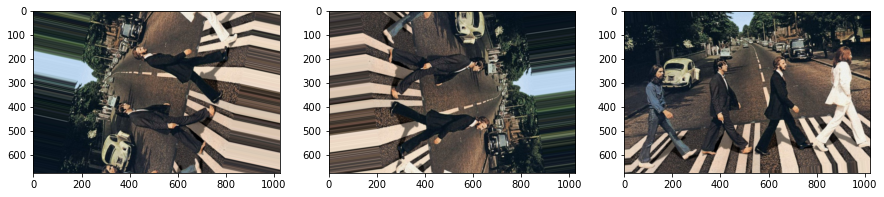

In [30]:
show_datagen(datagen_rot,image)

## Transformação de brilho

In [31]:
datagen_brilho = ImageDataGenerator(brightness_range=[0.5,2.0])

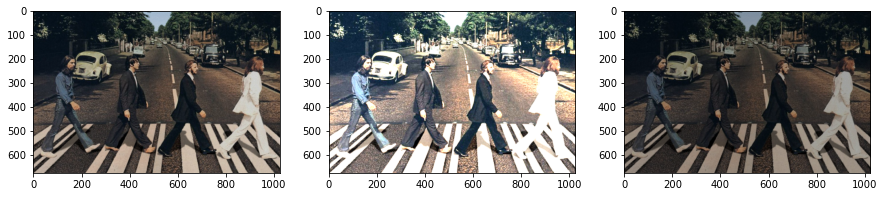

In [32]:
show_datagen(datagen_brilho,image)

## ZCA Whitenning

In [33]:
datagen_zca = ImageDataGenerator(zca_whitening=True,zca_epsilon=0.5)

C:\Users\Victoria\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


C:\Users\Victoria\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Victoria\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


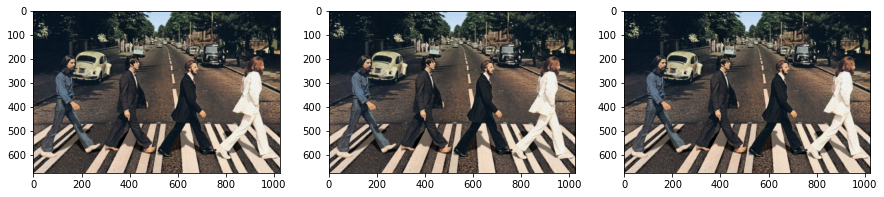

In [34]:
show_datagen(datagen_zca,image)

## Combinação final

In [35]:
datagen_todos = ImageDataGenerator(width_shift_range=0.2, height_shift_range= 0.2,
                   horizontal_flip=True, vertical_flip=True,
                   rotation_range=90,brightness_range=[0.5,2.0],
                   zca_whitening=True,zca_epsilon=0.5)

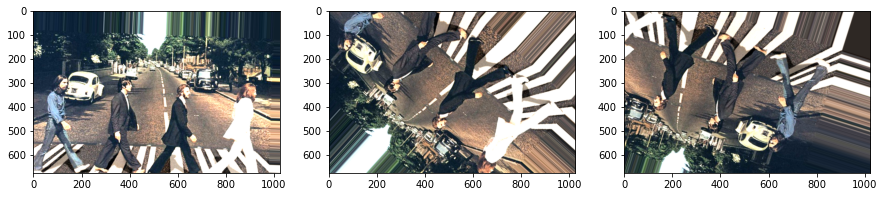

In [36]:
show_datagen(datagen_todos,image)